In [1]:
# Cell 1: Imports
import sys
from pathlib import Path

# Add parent directory to path so we can import our package
project_root = Path.cwd().parent if "notebooks" in str(Path.cwd()) else Path.cwd()
sys.path.insert(0, str(project_root))

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tvbingefriend_recommendation_service.services.data_loader_service import ShowDataLoader

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print("✓ Imports successful")
print(f"Project root: {project_root}")

✓ Imports successful
Project root: /Users/trb74/projects/tvbingefriend/tvbingefriend-recommendation-service


In [2]:
# Cell 2: Initialize data loader and fetch shows
loader = ShowDataLoader()

# Start with a small sample for exploration
print("Fetching shows from your API...")
shows = loader.get_all_shows(batch_size=100, max_shows=500)  # Get first 500 for exploration

print(f"\n✓ Loaded {len(shows)} shows")

Fetching shows from your API...

✓ Loaded 100 shows


In [3]:
# Cell 3: Convert to DataFrame and explore structure
df = pd.DataFrame(shows)

print("DataFrame shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

DataFrame shape: (100, 23)

Column names:
['id', 'url', 'name', 'type', 'language', 'genres', 'status', 'runtime', 'averageRuntime', 'premiered', 'ended', 'officialSite', 'schedule', 'rating', 'weight', 'network', 'webchannel', 'dvdCountry', 'externals', 'image', 'summary', 'updated', '_links']

First few rows:


,id,url,name,type,language,genres,status,runtime,averageRuntime,premiered,...,rating,weight,network,webchannel,dvdCountry,externals,image,summary,updated,_links
0,1,https://www.tvmaze.com/shows/1/under-the-dome,Under the Dome,Scripted,English,"[Drama, Science-Fiction, Thriller]",Ended,60.0,60,2013-06-24,...,{'average': 6.5},100,"{'id': 2, 'name': 'CBS', 'country': {'code': '...",None,None,"{'imdb': 'tt1553656', 'tvrage': 25988, 'thetvd...",{'medium': 'https://static.tvmaze.com/uploads/...,<p><b>Under the Dome</b> is the story of a sma...,1758151403,{'self': {'href': 'https://api.tvmaze.com/show...
1,2,https://www.tvmaze.com/shows/2/person-of-interest,Person of Interest,Scripted,English,"[Action, Crime, Science-Fiction]",Ended,60.0,60,2011-09-22,...,{'average': 8.7},99,"{'id': 2, 'name': 'CBS', 'country': {'code': '...",None,None,"{'imdb': 'tt1839578', 'tvrage': 28376, 'thetvd...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>You are being watched. The government has a...,1756334491,{'self': {'href': 'https://api.tvmaze.com/show...
2,3,https://www.tvmaze.com/shows/3/bitten,Bitten,Scripted,English,"[Drama, Horror, Romance]",Ended,60.0,60,2014-01-11,...,{'average': 7.4},98,"{'id': 7, 'name': 'CTV Sci-Fi Channel', 'count...",None,None,"{'imdb': 'tt2365946', 'tvrage': 34965, 'thetvd...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Based on the critically acclaimed series of...,1704793709,{'self': {'href': 'https://api.tvmaze.com/show...
3,4,https://www.tvmaze.com/shows/4/arrow,Arrow,Scripted,English,"[Drama, Action, Science-Fiction]",Ended,60.0,60,2012-10-10,...,{'average': 7.4},99,"{'id': 5, 'name': 'The CW', 'country': {'code'...",None,None,"{'imdb': 'tt2193021', 'tvrage': 30715, 'thetvd...",{'medium': 'https://static.tvmaze.com/uploads/...,"<p>After a violent shipwreck, billionaire play...",1736039613,{'self': {'href': 'https://api.tvmaze.com/show...
4,5,https://www.tvmaze.com/shows/5/true-detective,True Detective,Scripted,English,"[Drama, Crime, Thriller]",Running,60.0,63,2014-01-12,...,{'average': 8.1},100,"{'id': 8, 'name': 'HBO', 'country': {'code': '...",None,None,"{'imdb': 'tt2356777', 'tvrage': 31369, 'thetvd...",{'medium': 'https://static.tvmaze.com/uploads/...,<p>Touch darkness and darkness touches you bac...,1725758278,{'self': {'href': 'https://api.tvmaze.com/show...


In [4]:
# Cell 4: Examine data types and missing values
print("Data types:")
print(df.dtypes)
print("\n" + "=" * 50)
print("\nMissing values:")
missing = df.isnull().sum()
print(missing[missing > 0])
print("\n" + "=" * 50)
print("\nBasic stats:")
print(df.describe())

Data types:
id                  int64
url                object
name               object
type               object
language           object
genres             object
status             object
runtime           float64
averageRuntime      int64
premiered          object
ended              object
officialSite       object
schedule           object
rating             object
weight              int64
network            object
webchannel         object
dvdCountry         object
externals          object
image              object
summary            object
updated             int64
_links             object
dtype: object


Missing values:
runtime           4
ended            15
officialSite     18
network           4
webchannel      100
dvdCountry      100
dtype: int64


Basic stats:
               id     runtime  averageRuntime      weight       updated
count  100.000000   96.000000      100.000000  100.000000  1.000000e+02
mean    52.180000   55.718750       55.570000   96.520000  1.73338

In [5]:
# Cell 5: Explore key fields for content-based recommendations

# Genres
print("=" * 50)
print("GENRES ANALYSIS")
print("=" * 50)
print(f"Total shows: {len(df)}")
print(f"Shows with genres: {df['genres'].apply(lambda x: len(x) > 0).sum()}")
print(f"Shows without genres: {df['genres'].apply(lambda x: len(x) == 0).sum()}")

# Flatten genres and count
from collections import Counter

all_genres = []
for genres in df["genres"]:
    all_genres.extend(genres)

genre_counts = Counter(all_genres)
print(f"\nUnique genres: {len(genre_counts)}")
print("\nTop 20 genres:")
for genre, count in genre_counts.most_common(20):
    print(f"  {genre}: {count}")

GENRES ANALYSIS
Total shows: 100
Shows with genres: 98
Shows without genres: 2

Unique genres: 20

Top 20 genres:
  Drama: 68
  Crime: 29
  Thriller: 24
  Action: 24
  Comedy: 19
  Science-Fiction: 16
  Romance: 14
  Horror: 13
  Family: 11
  Supernatural: 10
  Adventure: 7
  Fantasy: 7
  Anime: 4
  Medical: 4
  Music: 3
  Mystery: 3
  Legal: 3
  History: 2
  Espionage: 1
  Western: 1


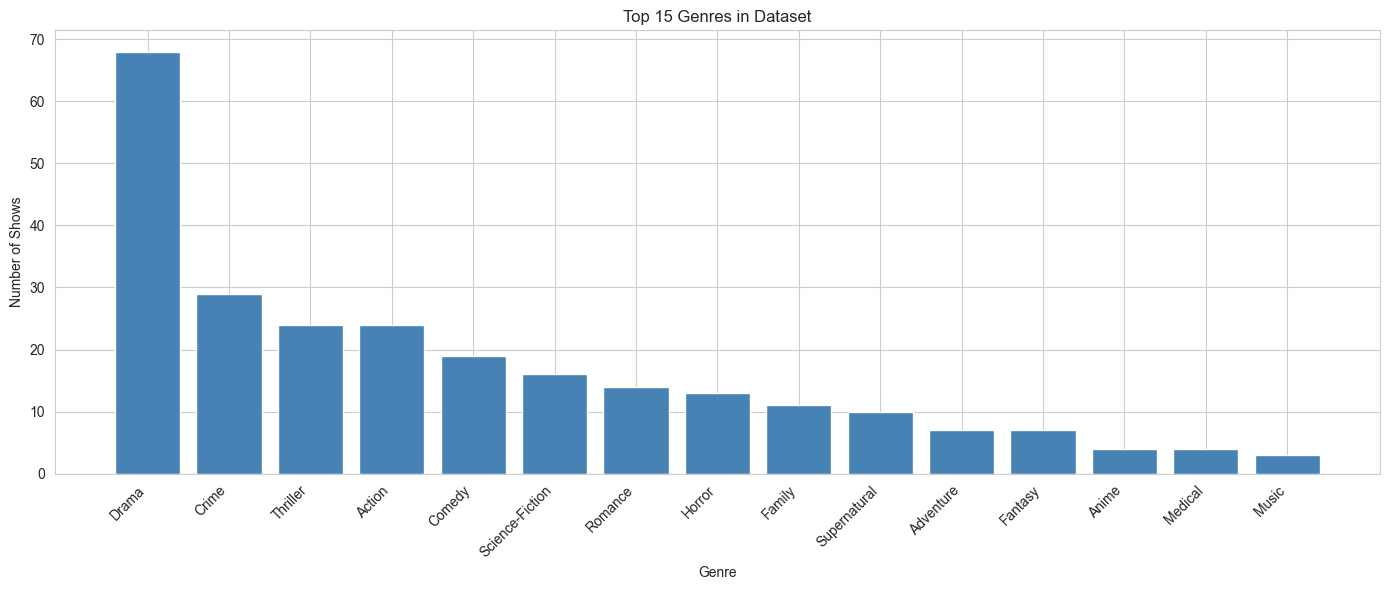

In [6]:
# Cell 6: Visualize genre distribution
plt.figure(figsize=(14, 6))

# Get top 15 genres
top_genres = dict(genre_counts.most_common(15))

plt.bar(range(len(top_genres)), list(top_genres.values()), color="steelblue")
plt.xticks(range(len(top_genres)), list(top_genres.keys()), rotation=45, ha="right")
plt.xlabel("Genre")
plt.ylabel("Number of Shows")
plt.title("Top 15 Genres in Dataset")
plt.tight_layout()
plt.show()

RATINGS ANALYSIS
Shows with ratings: 100
Shows without ratings: 0

Rating statistics:
count    100.00000
mean       7.64000
std        0.67315
min        5.40000
25%        7.40000
50%        7.70000
75%        8.10000
max        8.90000
Name: rating_avg, dtype: float64


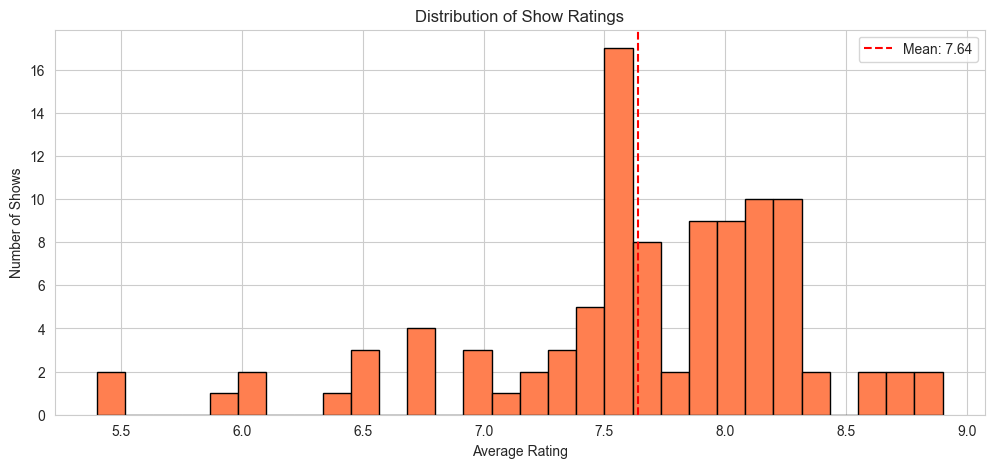

In [7]:
# Cell 7: Analyze ratings
print("=" * 50)
print("RATINGS ANALYSIS")
print("=" * 50)

# Extract average ratings
df["rating_avg"] = df["rating"].apply(lambda x: x.get("average") if isinstance(x, dict) else None)

print(f"Shows with ratings: {df['rating_avg'].notna().sum()}")
print(f"Shows without ratings: {df['rating_avg'].isna().sum()}")
print("\nRating statistics:")
print(df["rating_avg"].describe())

# Plot rating distribution
plt.figure(figsize=(12, 5))
df["rating_avg"].dropna().hist(bins=30, color="coral", edgecolor="black")
plt.xlabel("Average Rating")
plt.ylabel("Number of Shows")
plt.title("Distribution of Show Ratings")
plt.axvline(
    df["rating_avg"].mean(),
    color="red",
    linestyle="--",
    label=f'Mean: {df["rating_avg"].mean():.2f}',
)
plt.legend()
plt.show()

SHOW TYPE ANALYSIS
type
Scripted     89
Animation     6
Reality       5
Name: count, dtype: int64


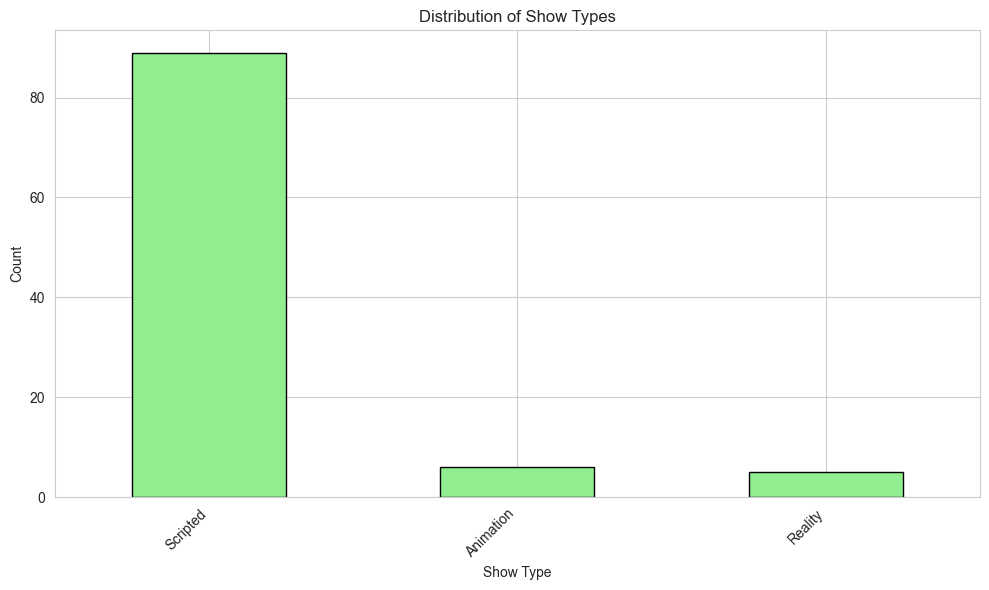

In [8]:
# Cell 8: Analyze show types
print("=" * 50)
print("SHOW TYPE ANALYSIS")
print("=" * 50)

type_counts = df["type"].value_counts()
print(type_counts)

plt.figure(figsize=(10, 6))
type_counts.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.xlabel("Show Type")
plt.ylabel("Count")
plt.title("Distribution of Show Types")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [9]:
# Cell 9: Analyze networks
print("=" * 50)
print("NETWORK ANALYSIS")
print("=" * 50)

# Extract network names
df["network_name"] = df["network"].apply(lambda x: x.get("name") if isinstance(x, dict) else None)
df["webchannel_name"] = df["webchannel"].apply(
    lambda x: x.get("name") if isinstance(x, dict) else None
)

# Combine network and webchannel
df["platform"] = df["network_name"].fillna(df["webchannel_name"])

print(f"Shows with platform info: {df['platform'].notna().sum()}")
print(f"Shows without platform info: {df['platform'].isna().sum()}")

print("\nTop 15 platforms:")
print(df["platform"].value_counts().head(15))

NETWORK ANALYSIS
Shows with platform info: 96
Shows without platform info: 4

Top 15 platforms:
platform
ABC                         15
CBS                         13
NBC                         12
FOX                          9
The CW                       7
FX                           5
HBO                          4
Syfy                         4
Paramount+ with Showtime     3
TNT                          3
CTV Sci-Fi Channel           2
Lifetime                     2
AMC                          2
NTV                          2
Showcase                     2
Name: count, dtype: int64


SUMMARY ANALYSIS
Shows with summaries: 100
Shows without summaries: 0

Summary length statistics:
count     100.000000
mean      541.340000
std       317.430951
min       135.000000
25%       318.000000
50%       464.500000
75%       691.750000
max      1588.000000
Name: summary_length, dtype: float64


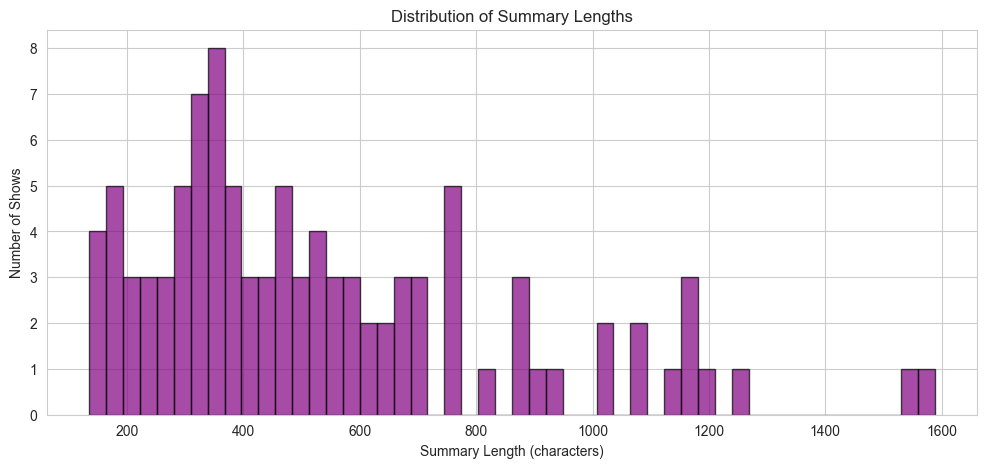


Example summary (first show):
Under the Dome
<p><b>Under the Dome</b> is the story of a small town that is suddenly and inexplicably sealed off from the rest of the world by an enormous transparent dome. The town's inhabitants must deal with surviving the post-apocalyptic conditions while searching for answers about the dome, where it came fro...


In [10]:
# Cell 10: Analyze summaries (important for NLP)
print("=" * 50)
print("SUMMARY ANALYSIS")
print("=" * 50)

df["summary_length"] = df["summary"].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

has_summary = df["summary_length"] > 0
no_summary = df["summary_length"] == 0

print(f"Shows with summaries: {has_summary.sum()}")
print(f"Shows without summaries: {no_summary.sum()}")
print("\nSummary length statistics:")
print(df["summary_length"].describe())

# Plot summary length distribution
plt.figure(figsize=(12, 5))
df[df["summary_length"] > 0]["summary_length"].hist(
    bins=50, color="purple", edgecolor="black", alpha=0.7
)
plt.xlabel("Summary Length (characters)")
plt.ylabel("Number of Shows")
plt.title("Distribution of Summary Lengths")
plt.show()

# Show example summary
print("\nExample summary (first show):")
print(df.iloc[0]["name"])
print(df.iloc[0]["summary"][:300] + "...")

LANGUAGE ANALYSIS
language
English     96
Japanese     4
Name: count, dtype: int64


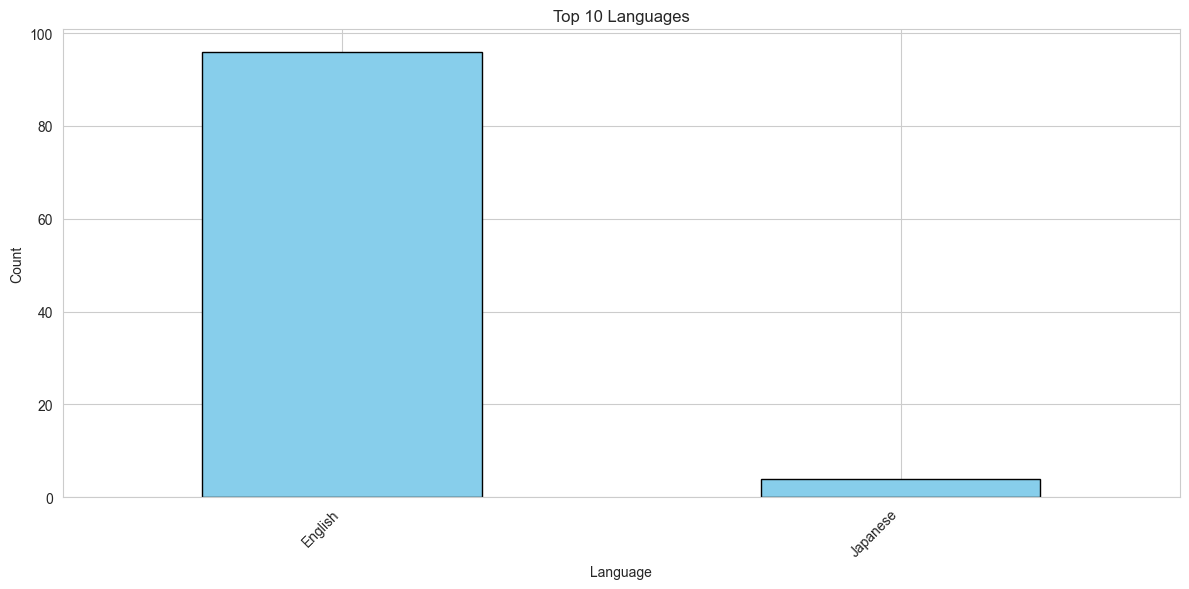

In [11]:
# Cell 11: Language distribution
print("=" * 50)
print("LANGUAGE ANALYSIS")
print("=" * 50)

lang_counts = df["language"].value_counts()
print(lang_counts.head(10))

plt.figure(figsize=(12, 6))
lang_counts.head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Language")
plt.ylabel("Count")
plt.title("Top 10 Languages")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

STATUS ANALYSIS
status
Ended               85
Running             14
To Be Determined     1
Name: count, dtype: int64


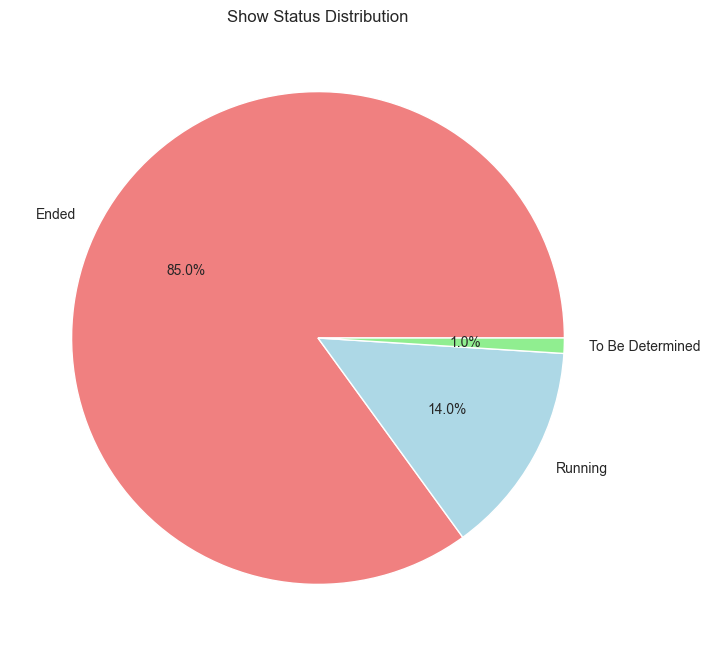

In [12]:
# Cell 12: Status analysis (Running vs Ended)
print("=" * 50)
print("STATUS ANALYSIS")
print("=" * 50)

status_counts = df["status"].value_counts()
print(status_counts)

plt.figure(figsize=(8, 8))
status_counts.plot(kind="pie", autopct="%1.1f%%", colors=["lightcoral", "lightblue", "lightgreen"])
plt.title("Show Status Distribution")
plt.ylabel("")
plt.show()

In [13]:
# Cell 13: Summary statistics for content-based features
print("=" * 50)
print("SUMMARY FOR CONTENT-BASED RECOMMENDATIONS")
print("=" * 50)

print(f"Total shows: {len(df)}")
print("\nFeature availability:")
print(
    f"  Genres: {(df['genres'].apply(len) > 0).sum()} shows ({(df['genres'].apply(len) > 0).sum()/len(df)*100:.1f}%)"
)
print(
    f"  Summaries: {(df['summary_length'] > 0).sum()} shows ({(df['summary_length'] > 0).sum()/len(df)*100:.1f}%)"
)
print(
    f"  Ratings: {df['rating_avg'].notna().sum()} shows ({df['rating_avg'].notna().sum()/len(df)*100:.1f}%)"
)
print(
    f"  Platform: {df['platform'].notna().sum()} shows ({df['platform'].notna().sum()/len(df)*100:.1f}%)"
)
print(f"  Type: {df['type'].notna().sum()} shows ({df['type'].notna().sum()/len(df)*100:.1f}%)")
print(
    f"  Language: {df['language'].notna().sum()} shows ({df['language'].notna().sum()/len(df)*100:.1f}%)"
)

print("\n✓ Data exploration complete!")
print("\nNext steps:")
print("1. Fetch season data to get season summaries")
print("2. Start feature engineering (notebook 02)")
print("3. Build content-based similarity (notebook 03)")

SUMMARY FOR CONTENT-BASED RECOMMENDATIONS
Total shows: 100

Feature availability:
  Genres: 98 shows (98.0%)
  Summaries: 100 shows (100.0%)
  Ratings: 100 shows (100.0%)
  Platform: 96 shows (96.0%)
  Type: 100 shows (100.0%)
  Language: 100 shows (100.0%)

✓ Data exploration complete!

Next steps:
1. Fetch season data to get season summaries
2. Start feature engineering (notebook 02)
3. Build content-based similarity (notebook 03)


In [14]:
# Cell 14: Test enriching shows with season data
print("=" * 50)
print("TESTING SEASON DATA ENRICHMENT")
print("=" * 50)

# Test with just a few shows
print("Enriching first 10 shows with season data...")
enriched_shows = loader.enrich_shows_with_seasons(batch_size=100, max_shows=10)

# Convert to DataFrame
df_enriched = pd.DataFrame(enriched_shows)

print(f"\n✓ Enriched {len(df_enriched)} shows")
print("\nNew columns:")
print(df_enriched.columns.tolist())

# Check season summary availability
print(
    f"\nShows with season summaries: {df_enriched['season_summaries'].apply(lambda x: len(x) > 0).sum()}"
)
print(f"Average season count: {df_enriched['season_count'].mean():.1f}")

# Show example
print("\nExample enriched show:")
example = df_enriched.iloc[0]
print(f"Name: {example['name']}")
print(f"Seasons: {example['season_count']}")
print(f"Season summaries: {len(example['season_summaries'])}")
if example["season_summaries"]:
    print(f"First season summary preview: {example['season_summaries'][0][:200]}...")

TESTING SEASON DATA ENRICHMENT
Enriching first 10 shows with season data...

✓ Enriched 100 shows

New columns:
['show_id', 'name', 'summary', 'genres', 'network', 'webchannel', 'rating', 'type', 'language', 'status', 'season_summaries', 'season_count', 'premiered', 'ended']

Shows with season summaries: 48
Average season count: 8.0

Example enriched show:
Name: Under the Dome
Seasons: 3
Season summaries: 0
